In [ ]:
import tensorflow as tf # Librería de ML
import numpy as np

In [ ]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [ ]:
# modelo = tf.keras.Sequential([
#     tf.keras.layers.Input(shape=[1]),  # Capa de entrada
#     tf.keras.layers.Dense(units=1)     # Capa densa
# ])

# Definición del modelo utilizando un objeto de entrada
modelo = tf.keras.Sequential([          # Crea un modelo secuencial que apila capas linealmente
    tf.keras.layers.Input(shape=[1]),   # Capa de entrada que espera una entrada de dimensión 1
    tf.keras.layers.Dense(units=3),     # Primera capa oculta con 3 neuronas que aplica una transformación lineal
    tf.keras.layers.Dense(units=3),     # Segunda capa oculta con 3 neuronas
    tf.keras.layers.Dense(units=1)      # Capa de salida con 1 neurona que proporciona la salida final del modelo
])

In [ ]:
# Estructura de la red neuronal
print("""
              +-----------+
              |   Entrada |
              | (Celsius) |
              +-----------+
                    |
                    v
          +-------------------+
          |     Capa Oculta   |  <-- 3 Neuronas
          |   (3 Neuronas)    |
          +-------------------+
                    |
                    v
          +-------------------+
          |     Capa Oculta   |  <-- 3 Neuronas
          |   (3 Neuronas)    |
          +-------------------+
                    |
                    v
          +-------------------+
          |      Salida       |  <-- 1 Neurona
          |   (Fahrenheit)    |
          +-------------------+
""")


In [ ]:
# Aquí estoy compilando el modelo, que es el paso en el que defino cómo va a aprender.
# Para ello, le indico qué optimizador y función de pérdida utilizar.
modelo.compile(
    # Estoy usando el optimizador Adam con una tasa de aprendizaje de 0.1.
    # El optimizador Adam ajusta los pesos del modelo de manera eficiente para minimizar el error.
    optimizer = tf.keras.optimizers.Adam(0.1),

    # Aquí le paso la función de pérdida 'mean_squared_error' (error cuadrático medio),
    # que es adecuada para problemas de regresión. Esta función mide qué tan lejos están las predicciones
    # del modelo respecto a los valores reales y penaliza más los errores grandes.
    loss = 'mean_squared_error'
)

In [ ]:
print("Comenzando entrenamiento...")

# Aquí estoy entrenando el modelo con los datos de entrada (celsius) y las salidas esperadas (fahrenheit).
# Utilizo 1000 épocas (epochs), que es el número de veces que el modelo verá el conjunto de datos completo durante el entrenamiento.
# La opción verbose=False hace que no se muestre información detallada del proceso de entrenamiento en la consola.
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)

# Imprimo un mensaje para indicar que el modelo ha sido entrenado exitosamente.
print("¡Modelo entrenado!")

Comenzando entrenamiento...
¡Modelo entrenado!


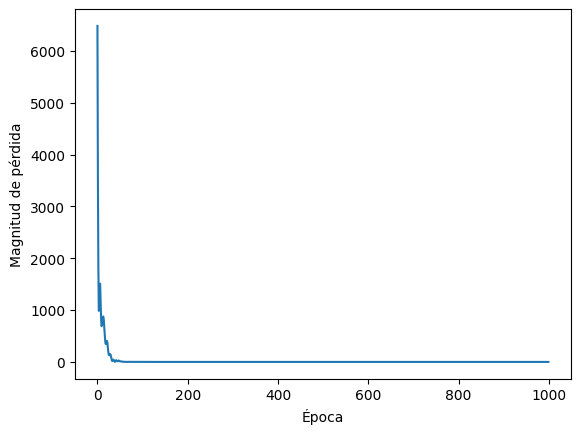

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Época')
plt.ylabel('Magnitud de pérdida')
plt.plot(historial.history['loss'])

In [ ]:
print('¡Hagamos una predicción!')
resultado = modelo.predict(np.array([[100.0]])) # Predecimos el resultado de entrada que son 100°F
print('El resultado es ' +str(resultado[0][0])+ '°F')

¡Hagamos una predicción!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
El resultado es 211.74744°F


In [ ]:
# Itero sobre cada peso en el modelo, donde 'modelo.weights' contiene todos los pesos y sesgos de las capas del modelo.
for peso in modelo.weights:
    # Imprimo el nombre del peso y su valor en forma de tensor.
    # 'peso.name' me da el nombre del tensor, que es útil para identificar a qué capa y qué tipo de parámetro pertenece.
    # 'peso.numpy()' convierte el tensor de TensorFlow a un array de NumPy, permitiendo visualizarlo de forma más comprensible.
    print(peso.name, peso.numpy())

kernel [[ 0.39590687 -0.17497474  0.24838287]]
bias [ 3.0739858 -3.4106474  2.5715837]
kernel [[ 0.44624028 -1.3498431   0.02977554]
 [-1.1993737   0.80595875 -0.19508423]
 [ 0.5614321  -0.73622584 -0.17416988]]
bias [ 3.0589123 -3.3833044 -2.5539613]
kernel [[ 0.92751455]
 [-1.5276746 ]
 [-0.41644862]]
bias [3.175728]


**Salida básica = (100×1.7981356)+31.930487 = 211.74405°F**